# $$ Logistic Regression with Python $$



## Objectives



*   Use scikit Logistic Regression to classify
*   confusion matrix


In this notebook, you will learn Logistic Regression, and then, you'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


<a id="ref1"></a>

## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass\_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

The objective of the **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ\_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


### Customer churn with Logistic Regression

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.


### Importing Needed packages


Let's first import required libraries:


In [1]:
import pandas as pd
import pylab as pl     ###  module is part of the Matplotlib library 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os

import scipy.optimize as opt      

from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
## Metrics
from sklearn.metrics import log_loss,jaccard_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
## Model
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [2]:
# from pyodide.http import pyfetch
import requests

async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)


<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


### Load the Telco Churn data

Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

To download the data, we will use `!wget` to download it from IBM Object Storage.


In [3]:
#Click here and press Shift+Enter
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Load Data From CSV File


In [4]:
path_off = os.path.join(os.getcwd(),'ChurnData.csv')  ## incase offline
churn_df = pd.read_csv(path_off)   ## offline

In [5]:
# churn_df = pd.read_csv(path)   ## online
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [7]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice

How many rows and columns are in this dataset in total? What are the names of columns?


In [8]:
# write your code here
churn_df.shape

(200, 10)

<details><summary>Click here for the solution</summary>

```python
churn_df.shape

```

</details>


Let's define X, and y for our dataset:


In [9]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [11]:
value,count = np.unique(y,return_counts=True)
value,count

(array([0, 1]), array([142,  58], dtype=int64))

In [12]:
np.bincount(y)

array([142,  58], dtype=int64)

## Also, we normalize the dataset:


In [13]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695]])

## Train/Test dataset


We split our dataset into train and test set:


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:


# `Solver`: This parameter specifies the algorithm to be used in the optimization problem. 

+ `'liblinear'`: Used for small datasets and is the default solver for logistic regression. It works well for both binary and multiclass problems.

+  `'newton-cg'`, `'lbfgs'`, `'sag'`: These solvers are suitable for multiclass problems, and they are faster for large datasets than `'liblinear'`. They also support L2 regularization.

+  `'saga'`: This solver is a variant of `'sag'` that also supports L1 regularization. It is suitable for large datasets.

In [15]:
# from sklearn.metrics import confusion_matrix
# from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=.002, solver='liblinear',class_weight='balanced',random_state=42).fit(X_train,y_train)
LR

LogisticRegression(C=0.002, class_weight='balanced', random_state=42,
                   solver='liblinear')

Now we can predict using our test set:


In [16]:
X_test[:3]

array([[ 0.53250132, -0.08931261,  0.42929083,  0.40488962,  0.91629947,
         0.19865678,  1.16316   ],
       [ 0.81044894, -0.62595491, -1.05102238, -0.11810256, -1.42318853,
        -0.4728591 , -0.85972695],
       [-0.25501694, -1.00927084, -1.05102238, -0.4303367 , -1.42318853,
        -0.24902047, -0.85972695]])

In [17]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [18]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

#  Predict_proba 

**`predict_proba`**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [19]:
decision_values = LR.decision_function(X_test)         # $ decision function= X⋅W+b $
decision_values 

array([ 0.02877519, -0.0536253 ,  0.01846178, -0.10652995,  0.0141168 ,
        0.0178944 ,  0.09465013, -0.05640122,  0.25591913, -0.10623676,
       -0.041496  , -0.13503182,  0.17090934,  0.22871732, -0.18236383,
       -0.00664524,  0.06401417,  0.14375508,  0.1238622 ,  0.09222655,
       -0.08041849,  0.04372761, -0.10938809,  0.04682718,  0.09090979,
       -0.26360831, -0.01049384,  0.05979041,  0.1010251 , -0.27394143,
       -0.20178994,  0.10003412,  0.2321847 , -0.2996751 , -0.02886047,
       -0.14352186,  0.27474677,  0.08939049, -0.19266234,  0.08936793])

In [20]:
probabilities = 1 / (1 + np.exp(-decision_values))          ## 1 / (1 + np.exp(-decision_values)) ===> sigmoid_fun
probabilities

array([0.5071933 , 0.48659689, 0.50461531, 0.47339267, 0.50352914,
       0.50447348, 0.52364488, 0.48590343, 0.56363286, 0.47346576,
       0.48962749, 0.46629325, 0.54262363, 0.55693136, 0.45453497,
       0.4983387 , 0.51599808, 0.53587701, 0.53092602, 0.52304031,
       0.4799062 , 0.51093016, 0.47268021, 0.51170466, 0.52271181,
       0.43447691, 0.49737656, 0.51494315, 0.52523482, 0.43193974,
       0.449723  , 0.5249877 , 0.5577868 , 0.42563691, 0.49278538,
       0.464181  , 0.56825786, 0.52233275, 0.45198285, 0.52232713])

In [21]:
yhat_prob = LR.predict_proba(X_test)
pd.DataFrame(yhat_prob,columns=["Prob_of 0","Prob_of 1"])[:5]

,Prob_of 0,Prob_of 1
0,0.492807,0.507193
1,0.513403,0.486597
2,0.495385,0.504615
3,0.526607,0.473393
4,0.496471,0.503529


In [22]:
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))

LogLoss: : 0.66


<h1 id="evaluation">Evaluation</h1>


### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [23]:
unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 25
Value: 1, Count: 15


In [24]:
unique_values, counts = np.unique(yhat, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 18
Value: 1, Count: 22


In [25]:
unique_values, counts = np.unique(y_test[(y_test==yhat)], return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 16
Value: 1, Count: 13


In [26]:
y_test[(y_test==yhat)]

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0])

In [45]:
# from sklearn.metrics import jaccard_score
 ## average is set to None, 
 ##   it returns an array where each element corresponds to the Jaccard similarity coefficient for a specific class.
 ## pos_label= 0,1    ### labels=[1,0]
    
jaccard_score(y_test, yhat,average='micro')    #.6
# jaccard_score(y_test, yhat,pos_label=1) = 0.375               ## tp/(tp+fp+fn)
# jaccard_score(y_test, yhat,pos_label=0)   =0.7058823529411765   ## tn/(tn+fp+fn)
# jaccard_score(y_test, yhat,average=None,labels=[0,1])  = array([0.70588235, 0.375])

0.5686274509803921

In [ ]:
0.5734953703703703

In [28]:
tn,fp,fn,tp = confusion_matrix(y_test,yhat).ravel()
print("TN: {}, FP: {}, FN: {}, TP: {}".format(tn, fp, fn, tp))

TN: 16, FP: 9, FN: 2, TP: 13


In [29]:
### Jaccard score for the [positive class]
tp/(tp+fp+fn)

0.5416666666666666

In [30]:
### Jaccard score for the [negative class]
tn/(tn+fp+fn)

0.5925925925925926

In [31]:
### J(y,y^)==>> |y n y^|/|y|+|y^|-|y U y^|
29/(40+40-29)

0.5686274509803921

### Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.


In [32]:
# from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  ### reshape() == [:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  ### itertools & product
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[13  2]
 [ 9 16]]


Confusion matrix, without normalization
[[13  2]
 [ 9 16]]


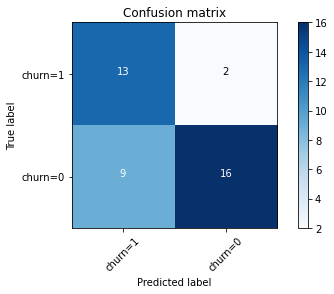

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

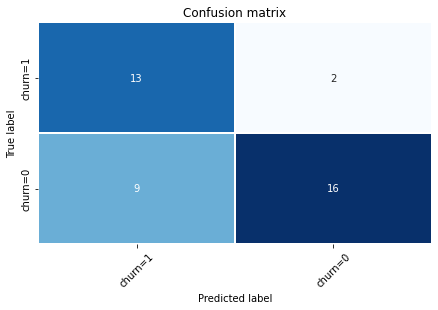

In [34]:
classes=['churn=1','churn=0']
sns.heatmap(cnf_matrix,annot=True,linewidths=1.5, cmap="Blues",cbar=None)
# plt.imshow(cnf_matrix, interpolation='antialiased',cmap="Blues")

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks+.5, classes, rotation=45)
plt.yticks(tick_marks+.5, classes)
plt.tight_layout()
                                                # np.set_printoptions(precision=2) ## This affects how floating-point numbers are displayed when using functions like print or displaying arrays.
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
precision_score(y_test,yhat),recall_score(y_test,yhat),f1_score(y_test,yhat)

(0.5909090909090909, 0.8666666666666667, 0.7027027027027029)

Let's look at first row. The first row is for customers whose actual churn value in the test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1.
Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

This means, for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.


In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.59      0.87      0.70        15

    accuracy                           0.73        40
   macro avg       0.74      0.75      0.72        40
weighted avg       0.78      0.72      0.73        40



In [37]:
# (0.83 + 0.55 )/2
(.74+.70)/2

0.72

Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the __harmonic average__ of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


# `log loss`

Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


In [38]:
# from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6589468760244608

In [39]:
## scores calculated using sklearn & return scores using in ROC_AUC metric 
y_scores = LR.decision_function(X_test)
y_scores

array([ 0.03, -0.05,  0.02, -0.11,  0.01,  0.02,  0.09, -0.06,  0.26,
       -0.11, -0.04, -0.14,  0.17,  0.23, -0.18, -0.01,  0.06,  0.14,
        0.12,  0.09, -0.08,  0.04, -0.11,  0.05,  0.09, -0.26, -0.01,
        0.06,  0.1 , -0.27, -0.2 ,  0.1 ,  0.23, -0.3 , -0.03, -0.14,
        0.27,  0.09, -0.19,  0.09])

In [40]:
### using ROC_AUC
roc_auc_score(y_test,y_scores)

0.8133333333333334

<h2 id="practice">Practice</h2>
Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?


In [41]:
# write your code here
LR2 = LogisticRegression(C=.1, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.59
